# Lesson 2) Data Preparation and Preprocessing

***
## Chapter 1) Exploring Data
***

### 1.1 Understanding the data and its characteristics

#### Understanding the data and its characteristics is a critical step in the machine learning process. Before starting any analysis, it is important to have a clear understanding of the data being used. This includes knowing the data types, such as numerical, categorical, or text, and understanding any potential limitations or biases in the data.

#### Domain knowledge and understanding of the data are also essential in machine learning. Without proper domain knowledge, it is difficult to understand the nuances of the data and make informed decisions during the analysis process. Additionally, understanding the data can help to identify potential problems or limitations in the data that may impact the accuracy of the analysis. Overall, understanding the data is a foundational step in the machine learning process and is essential for producing accurate and reliable results.

<img src="images/lesson_2/img_1.jpg" alt="Alternative text" />

***
### 1.2 Load datasets using pandas

In [47]:
# Pandas is a Python library used for data manipulation and analysis.
# It provides data structures and functions to work with structured data, such as data frames and series
import pandas as pd

# Load csv file using read_csv() method
dataframe = pd.read_csv('data/dataset_example.csv')

# View the first 5 rows
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
# show dataframe columns
dataframe.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [49]:
# show dataframe data types
dataframe.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***
### 1.3 Visualizing data using plots and charts

#### In machine learning, visualizing data is an essential step to understand the relationships and patterns that exist within the data. Python libraries such as Matplotlib and Seaborn provide powerful tools to create visualizations of different types of data. Scatter plots are useful to identify relationships between two continuous variables, while histograms and bar charts are great for understanding the distribution of data or comparing categorical variables. It is important to choose the right type of visualization for the specific data and question at hand. By visualizing data, we can better understand its structure and use this understanding to inform the next steps in the machine learning process.

In [50]:
# import the requried libraries using 'import'
import matplotlib.pyplot as plt
import seaborn as sns
# numpy is a Python library used for numerical computations. 
# It provides a multidimensional array object, as well as functions to perform mathematical operations on these arrays efficiently.
import numpy as np

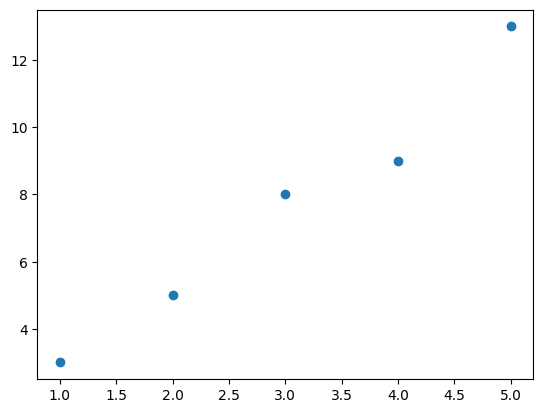

In [51]:
# declare some random points to be plotted
x = [1, 2, 3, 4, 5]
y = [3, 5, 8, 9, 13]

# to create a scatter plot, we can use the scatter function in Matplotlib
plt.scatter(x,y)
# plt.plot(x,y)
plt.show()

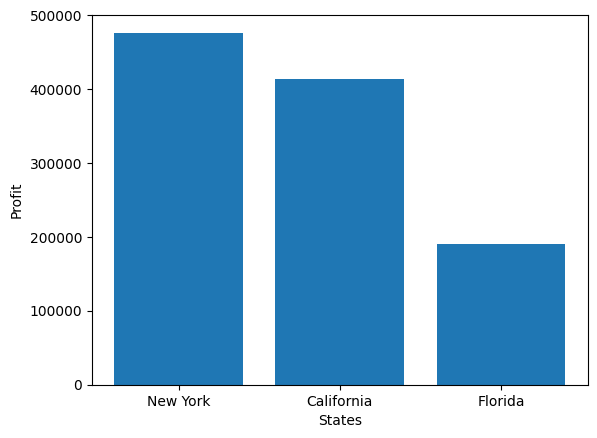

In [67]:
# get the States and Profits data from the dataset columns
states = dataframe['State']
profit = dataframe['Profit']

# plot a bar using them
plt.bar(states, profit)

# add axis labels
plt.xlabel('States')
plt.ylabel('Profit')
plt.show()

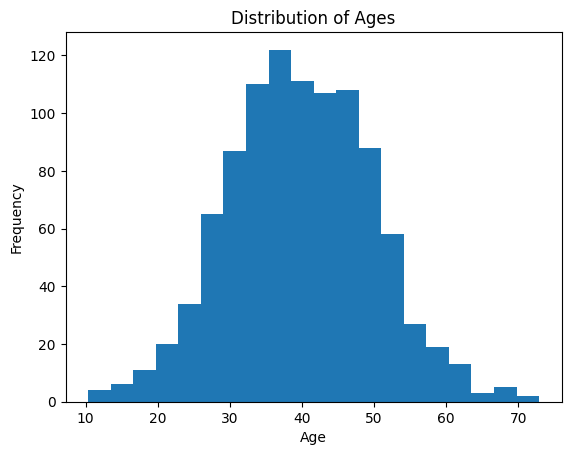

In [53]:
# this line generates an array of 1000 normally distributed random numbers with a mean of 40 and standard deviation of 10, which can be used to simulate a dataset of ages.
ages = np.random.normal(40, 10, 1000)

# create a histogram with 20 bins (affect the appearance and interpretation of the histogram)
plt.hist(ages, bins=20)

# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

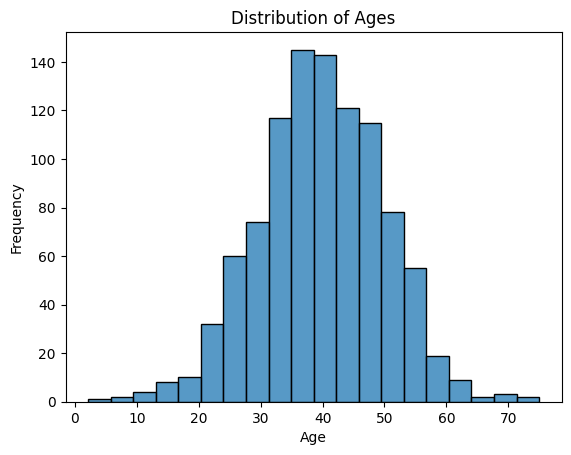

In [54]:
# generate some random data
ages = np.random.normal(40, 10, 1000)

# create a histogram using Seaborn
sns.histplot(ages, bins=20)

# add axis labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

***
## Chapter 2) Data Cleaning and Preprocessing
***

### 2.1 Removing duplicates and irrelevant data

#### Duplicates in data refer to instances where there are two or more identical records or observations. Duplicates can be problematic for several reasons. First, they can cause errors in data analysis because they increase the weight of the duplicated observations, leading to incorrect conclusions. Secondly, duplicates can also impact the efficiency of data storage, as it takes up unnecessary space. Finally, duplicates can also cause confusion and can make it challenging to maintain data quality and consistency. Therefore, removing duplicates is an essential step in data cleaning and preparation to ensure accurate and meaningful analysis.

In [55]:
import pandas as pd

# suppose we have a dataframe with a column called Name and we want to identify and remove any duplicate names in the dataset
data = pd.DataFrame({'Name': ['John', 'Jane', 'Joe', 'John', 'Joe']})

# identify the duplicates using the duplicated() method to identify the duplicates
# the subest=['Name'] parameter specifies which columns to consider when removing duplicates
duplicates = data.duplicated(subset=['Name'])

# remove the duplicates using the drop_duplicates() method to remove the identified duplicates
# inplace=True modifies the dataframe directly (so our data) without creating a new object
data.drop_duplicates(subset=['Name'], inplace=True)

data

,Name
0,John
1,Jane
2,Joe


#### Identifying and removing irrelevant data is important in data cleaning and preprocessing because irrelevant data can affect the accuracy and performance of a machine learning model. Irrelevant data can introduce noise and bias to the model, which can lead to incorrect predictions and poor performance.
#### Irrelevant data can take many forms, such as data that is not related to the target variable or data that is not representative of the population being studied. Removing irrelevant data can improve the quality of the dataset, reduce the dimensionality of the feature space, and make the model more efficient.
#### Furthermore, irrelevant data can also lead to overfitting, which occurs when a model is too complex and fits the training data too closely. Overfitting can cause the model to perform poorly on new data, which defeats the purpose of building a machine learning model.

***
### 2.2 Identifying missing values and dealing with them

#### Identifying missing values in the data is essential as it can affect the performance of machine learning models. Missing values can result in biased or incorrect results, which can mislead the data analysis process. Therefore, it is crucial to identify missing data and handle it appropriately. In machine learning, missing data can be dealt with by imputing the missing values or deleting the rows or columns with missing data. Choosing the right strategy depends on the data set and the specific problem being addressed.

#### Suppose we have a small dataset of three samples with two features, and one of the samples has a missing value:


In [56]:
import pandas as pd

# create a dataset with a missing value
data = pd.DataFrame({'Feature 1': [2.3, 1.8, None], 'Feature 2': [4.5, 3.6, 2.1]})
data

,Feature 1,Feature 2
0,2.3,4.5
1,1.8,3.6
2,NaN,2.1


In [57]:
# isnull() function is going to identify the missing value
data.isnull()

,Feature 1,Feature 2
0,False,False
1,False,False
2,True,False


#### We can see that the missing value in the third sample is identified as "True", so we can use Pandas fillna() function to replace the missing value with a value of our choice, such as the mean of the feature:

In [58]:
mean = data['Feature 1'].mean()
# inplace=True modifies the dataframe directly (so our data) without creating a new object
data.fillna(mean, inplace=True)

data

,Feature 1,Feature 2
0,2.30,4.5
1,1.80,3.6
2,2.05,2.1


#### In the missing value example, 'mean' refers to the average value of the non-missing data in the 'Feature 1' array. The line of code <b>data['Feature 1'].mean()</b> calculates the mean value. This value is used in the next line of code <b>data.fillna(mean, inplace=True)</b> to replace the missing values (NaN) in the 'Feature 1' array with the mean value. Replacing missing values with the mean is a form of imputation, which is a common technique used to handle missing data.